### Differential Equation

$\frac{\mathrm{d}\Psi}{\mathrm{d}x} = -\frac{1}{5}\Psi + e^{-\frac{x}{5}}cos(x),$

$\Psi(0) = 0, x \in [0, 2]$

In [5]:
from typing import List, Callable
import autograd.numpy as np

from core.neural_network import init_weights, forward
from core.optimizers import gradient_descent, adam
from core.activation_functions import elu, sigmoid, tanh, arctan
from core.plotting_tools import plot_ode, plot_system_ode
from core.training_utility import plot_loss

In [2]:
PSI_0 = np.array([0])


def derivative(x, psi) -> np.ndarray:
    """Example #2 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_dot = -0.2 * psi + np.exp(-x / 5) * np.cos(x)
    return psi_dot


def analytical_solution(x):
    """Analytical solution to example #2.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    return np.exp(-x / 5) * np.sin(x)


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

In [7]:
def train():
    t = np.arange(0, 2, 0.2)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights = init_weights(1, hidden_sizes, 1)
    loss = adam(
        t,
        [nn_weights],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=50000,
        step_size=0.001,
        log=False,
        plot=False,
    )

    return nn_weights, activation_fns, loss


nn_weights, activation_fns, loss = train()

### Evaluating Results

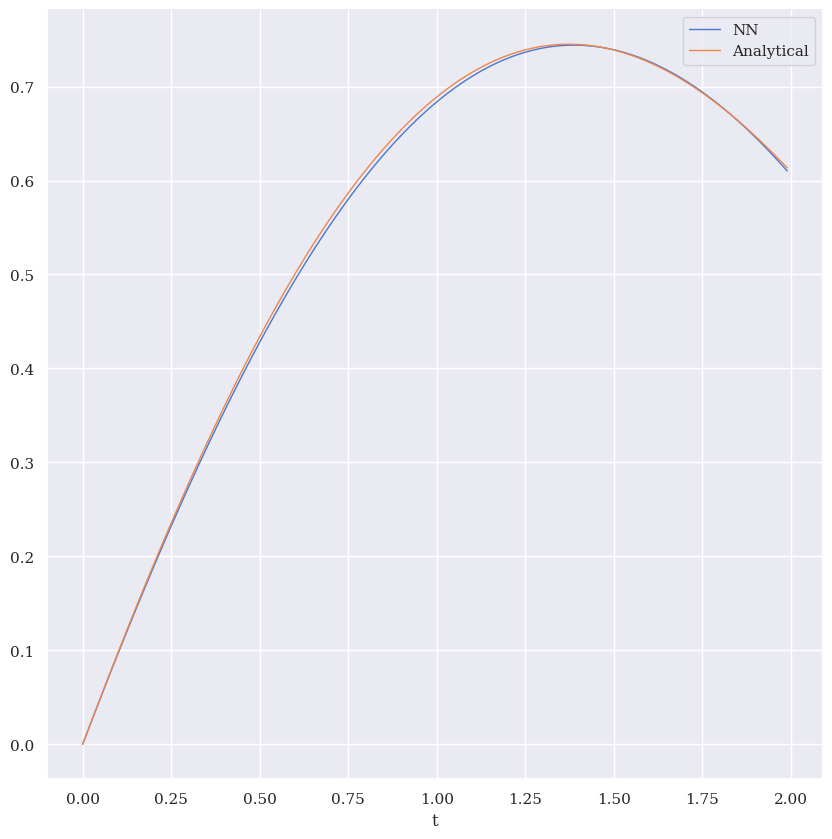

In [8]:
t = np.arange(0, 2, 0.01)
res = trial_solution(t, [nn_weights], activation_fns)
an_sol = analytical_solution(t)
plot_ode(t, res, an_sol)

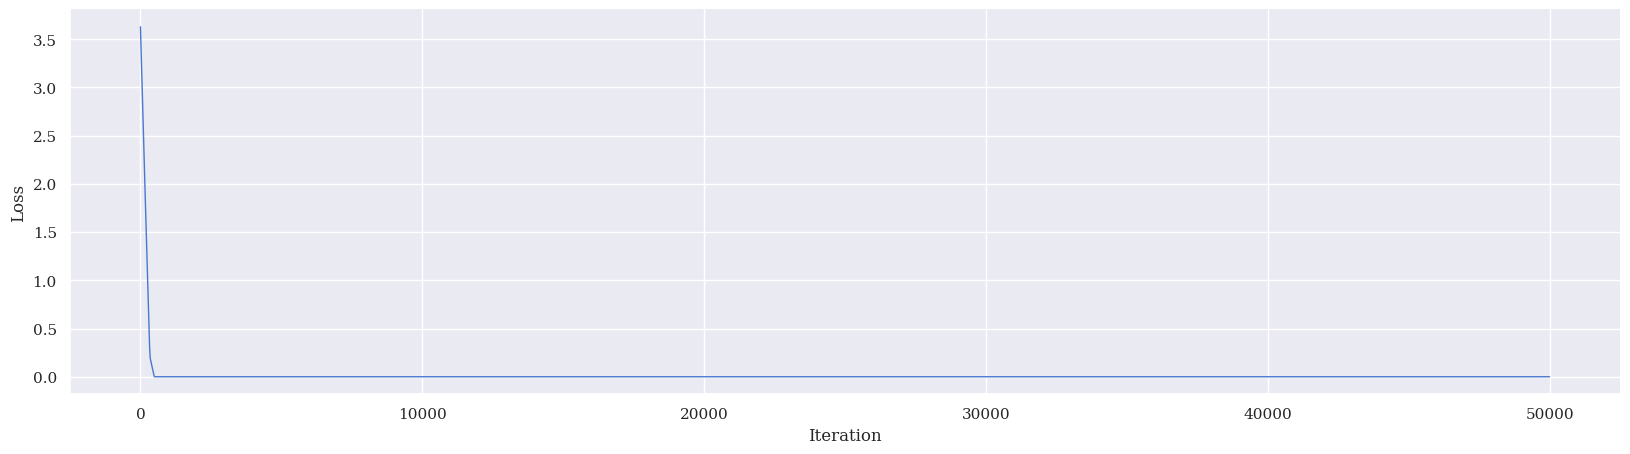

In [9]:
plot_loss(len(loss), loss)